In [123]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/online-payments-fraud-detection-dataset/PS_20174392719_1491204439457_log.csv


In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [ ]:
dataset link = 

In [125]:
data = pd.read_csv(r'/kaggle/input/online-payments-fraud-detection-dataset/PS_20174392719_1491204439457_log.csv')

In [126]:
data.shape

(6362620, 11)

In [127]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [128]:
data.drop(columns = ['step','type','nameOrig','nameDest','isFlaggedFraud'], axis=1, inplace=True)

In [129]:
data.head()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,9839.64,170136.0,160296.36,0.0,0.0,0
1,1864.28,21249.0,19384.72,0.0,0.0,0
2,181.00,181.0,0.00,0.0,0.0,1
3,181.00,181.0,0.00,21182.0,0.0,1
4,11668.14,41554.0,29885.86,0.0,0.0,0


In [130]:
data.columns

Index(['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'isFraud'],
      dtype='object')

In [131]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 6 columns):
 #   Column          Dtype  
---  ------          -----  
 0   amount          float64
 1   oldbalanceOrg   float64
 2   newbalanceOrig  float64
 3   oldbalanceDest  float64
 4   newbalanceDest  float64
 5   isFraud         int64  
dtypes: float64(5), int64(1)
memory usage: 291.3 MB


In [132]:
float64_columns = data.select_dtypes('float64').columns
data[float64_columns] = data[float64_columns].astype('float32')

In [133]:
data['isFraud'] = data['isFraud'].astype('int32')

In [134]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 6 columns):
 #   Column          Dtype  
---  ------          -----  
 0   amount          float32
 1   oldbalanceOrg   float32
 2   newbalanceOrig  float32
 3   oldbalanceDest  float32
 4   newbalanceDest  float32
 5   isFraud         int32  
dtypes: float32(5), int32(1)
memory usage: 145.6 MB


In [135]:
data.isnull().sum()

amount            0
oldbalanceOrg     0
newbalanceOrig    0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64

In [136]:
data.duplicated().sum()

97882

In [137]:
data = data.drop_duplicates(keep='first')

In [138]:
data.corr()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
amount,1.000000,-0.004479,-0.009144,0.293484,0.458700,0.073230
oldbalanceOrg,-0.004479,1.000000,0.998850,0.064889,0.040528,0.009323
newbalanceOrig,-0.009144,0.998850,1.000000,0.066431,0.040384,-0.008268
oldbalanceDest,0.293484,0.064889,0.066431,1.000000,0.976559,-0.006004
newbalanceDest,0.458700,0.040528,0.040384,0.976559,1.000000,-0.000180
isFraud,0.073230,0.009323,-0.008268,-0.006004,-0.000180,1.000000


<Axes: >

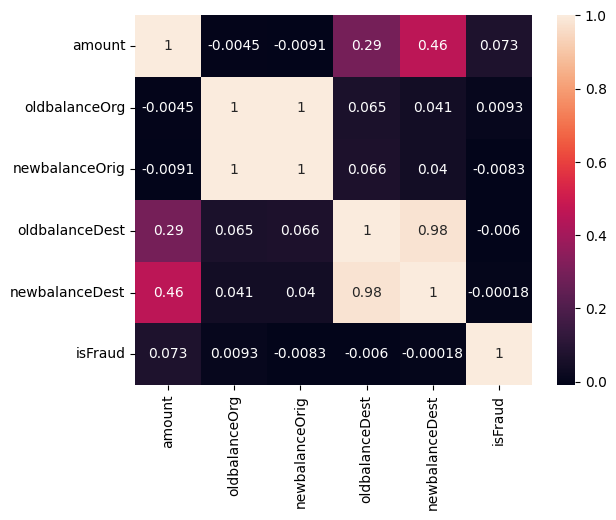

In [139]:
sns.heatmap(data.corr(), annot=True)

In [140]:
data.drop(columns=['oldbalanceOrg','oldbalanceDest'], axis=1, inplace=True)

<Axes: >

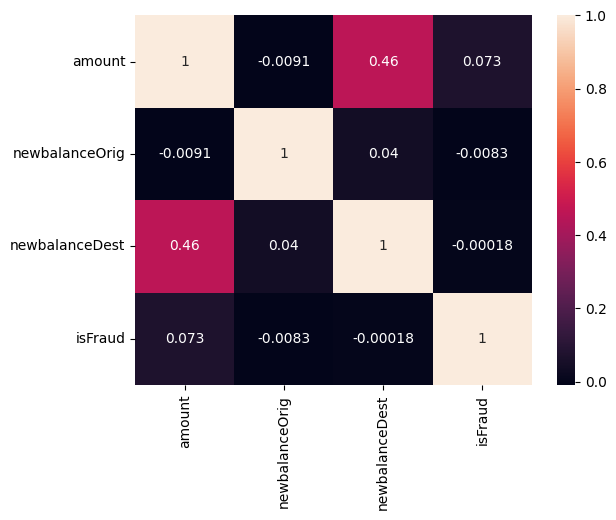

In [141]:
sns.heatmap(data.corr(), annot=True)

In [142]:
data.head()

,amount,newbalanceOrig,newbalanceDest,isFraud
0,9839.639648,160296.359375,0.0,0
1,1864.280029,19384.720703,0.0,0
2,181.000000,0.000000,0.0,1
3,181.000000,0.000000,0.0,1
4,11668.139648,29885.859375,0.0,0


In [143]:
X = data.drop(columns=['isFraud'], axis=1)
y = data['isFraud']

In [144]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

# Scale the data
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)

# Split the scaled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Create and train logistic regression model
lr = LogisticRegression()
lr.fit(X_train, y_train)

# Predict using the training data
y_train_pred = lr.predict(X_train)

# Predict using the testing data
y_test_pred = lr.predict(X_test)

# Calculate accuracy for training and testing data
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print('Training Accuracy:', train_accuracy)
print('Testing Accuracy:', test_accuracy)
print('Accuracy:', test_accuracy)

Training Accuracy: 0.9987044548953568
Testing Accuracy: 0.9987357815328329
Accuracy: 0.9987357815328329


## Confusion matrix <a class="anchor" id="15"></a>


A confusion matrix is a tool for summarizing the performance of a classification algorithm. A confusion matrix will give us a clear picture of classification model performance and the types of errors produced by the model. It gives us a summary of correct and incorrect predictions broken down by each category. The summary is represented in a tabular form.


Four types of outcomes are possible while evaluating a classification model performance. These four outcomes are described below:-


**True Positives (TP)** – True Positives occur when we predict an observation belongs to a certain class and the observation actually belongs to that class.


**True Negatives (TN)** – True Negatives occur when we predict an observation does not belong to a certain class and the observation actually does not belong to that class.


**False Positives (FP)** – False Positives occur when we predict an observation belongs to a    certain class but the observation actually does not belong to that class. This type of error is called **Type I error.**



**False Negatives (FN)** – False Negatives occur when we predict an observation does not belong to a certain class but the observation actually belongs to that class. This is a very serious error and it is called **Type II error.**



These four outcomes are summarized in a confusion matrix given below.

In [145]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_pred))


print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

[[1251257      92]
 [   1492     107]]

True Positives(TP) =  1251257

True Negatives(TN) =  107

False Positives(FP) =  92

False Negatives(FN) =  1492


The confusion matrix shows `1251257 +107 = 1251364 correct predictions` and `92 + 1492 = 1584 incorrect predictions`.


In this case, we have


- `True Positives` (Actual Positive:1 and Predict Positive:1) - 1251257


- `True Negatives` (Actual Negative:0 and Predict Negative:0) - 107


- `False Positives` (Actual Negative:0 but Predict Positive:1) - 92 `(Type I error)`


- `False Negatives` (Actual Positive:1 but Predict Negative:0) - 1492 `(Type II error)`

<Axes: >

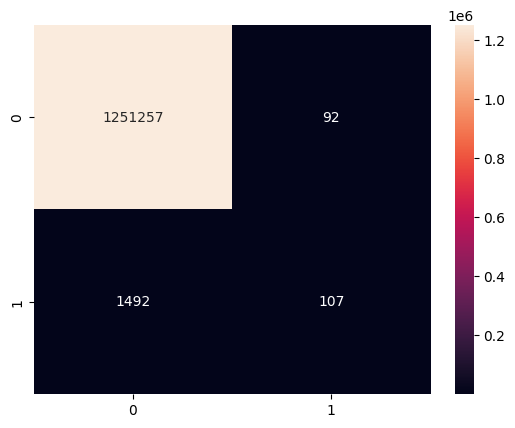

In [146]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')

### Classification Report <a class="anchor" id="16.1"></a>


**Classification report** is another way to evaluate the classification model performance. It displays the  **precision**, **recall**, **f1** and **support** scores for the model. I have described these terms in later.

We can print a classification report as follows:-

In [147]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1251349
           1       0.54      0.07      0.12      1599

    accuracy                           1.00   1252948
   macro avg       0.77      0.53      0.56   1252948
weighted avg       1.00      1.00      1.00   1252948



In [148]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [149]:
# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.9987


##  ROC - AUC <a class="anchor" id="18"></a>



### ROC Curve


Another tool to measure the classification model performance visually is **ROC Curve**. ROC Curve stands for **Receiver Operating Characteristic Curve**. An **ROC Curve** is a plot which shows the performance of a classification model at various 
classification threshold levels. 



The **ROC Curve** plots the **True Positive Rate (TPR)** against the **False Positive Rate (FPR)** at various threshold levels.



**True Positive Rate (TPR)** is also called **Recall**. It is defined as the ratio of `TP to (TP + FN).`



**False Positive Rate (FPR)** is defined as the ratio of `FP to (FP + TN).`







In the ROC Curve, we will focus on the TPR (True Positive Rate) and FPR (False Positive Rate) of a single point. This will give us the general performance of the ROC curve which consists of the TPR and FPR at various threshold levels. So, an ROC Curve plots TPR vs FPR at different classification threshold levels. If we lower the threshold levels, it may result in more items being classified as positve. It will increase both True Positives (TP) and False Positives (FP).

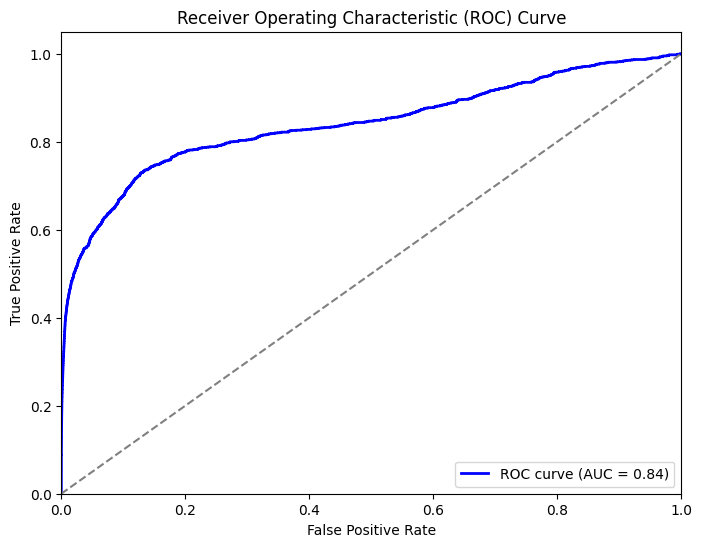

In [150]:
from sklearn.metrics import roc_curve, auc


# Predict probabilities for the positive class
y_prob = model.predict_proba(X_test_scaled)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate Area Under the Curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [151]:
# Applying 5-Fold Cross Validation

from sklearn.model_selection import cross_val_score

scores = cross_val_score(lr, X_train, y_train, cv = 5, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))

Cross-validation scores:[0.99871004 0.99869907 0.99870705 0.99870904 0.99870605]


We can summarize the cross-validation accuracy by calculating its mean.

In [157]:
# compute Average cross-validation score

print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Average cross-validation score: 0.9987


Our, original model score is found to be 0.9987. The average cross-validation score is 0.9987. So, we can conclude that cross-validation does not result in performance improvement.

## Hyperparameter Optimization using GridSearch CV <a class="anchor" id="21"></a>

In [153]:
from sklearn.model_selection import GridSearchCV


parameters = [{'penalty':['l1','l2']}, 
              {'C':[1, 10, 100, 1000]}]



grid_search = GridSearchCV(estimator = lr,  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)


grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid=[{'penalty': ['l1', 'l2']}, {'C': [1, 10, 100, 1000]}],
             scoring='accuracy')

In [154]:
# examine the best model

# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search.best_score_))

# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid_search.best_params_))

# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search.best_estimator_))

GridSearch CV best score : 0.9987


Parameters that give the best results : 

 {'C': 10}


Estimator that was chosen by the search : 

 LogisticRegression(C=10)


In [155]:
# calculate GridSearch CV score on test set

print('GridSearch CV score on test set: {0:0.4f}'.format(grid_search.score(X_test, y_test)))

GridSearch CV score on test set: 0.9987


Our, original model score is found to be 0.9987. The Gried searvh Cv score is 0.9987. So, we can conclude that GridSearchCv does not result in performance improvement.

## Result and Conclusion

* The logistic regression model accuracy score is 0.99.87. So, the model does a very good job in predicting whether or online payments are fraudulent or not. It suggests that the features I 've used in my logistic regression model are effective in distinguishing between fraudulent and legitimate transactions.
* The model shows no signs of overfitting.
* Increasing the value of C results in higher test set accuracy and also a slightly increased training set accuracy. So, we can conclude that a more complex model should perform better.
* ROC AUC of our model approaches towards 1.  So, we can conclude that our classifier does a good job in predicting whether fraudulent and legitimate transactions.
* In the  model, we have TP = 1251257 whereas TP1 = 107. So, we get approximately same number of false positives. Also, FN = 92 whereas FN1 = 1492.
* Our, original model score is found to be 0.9987. The average cross-validation score is 0.9987. So, we can conclude that cross-validation does not result in performance improvement.
* Our, original model score is found to be 0.9987. The Grid SearchCv score is 0.9987. So, we can conclude hyper meter tunning does not result in performance improvement.

In [ ]:
`1251257 +107 = 1251364 correct predictions` and `92 + 1492 = 1584